# Proof that neural nets can compute any function


In the mathematical theory of artificial neural networks, universal approximation theorems are results that establish the density of an algorithmically generated class of functions within a given function space of interest.

To test this theory lets generate test data with some random function which we define.

Lets say that the function,

f(x) = $\sqrt{3x-1}+(1+x)^2$

In [224]:
# All imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [225]:
# let X be the ndarrays from numy
def random_function(x):
    #return np.power(3*x - 1, 1)+np.power((1+x), 2)
    return np.sin(x)

In [226]:
def generate_x(count=20, step=0.5):
    #return np.random.randn(count)
    return np.arange(0, count, step=0.5)

In [227]:
# lets test this function
x = generate_x(20)
y = random_function(x)

In [228]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5])

In [229]:
y

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112,
       -0.54402111, -0.87969576, -0.99999021, -0.87545217, -0.53657292,
       -0.0663219 ,  0.42016704,  0.80378443,  0.99060736,  0.93489506,
        0.65028784,  0.20646748, -0.28790332, -0.71178534, -0.96139749,
       -0.97562601, -0.75098725, -0.34248062,  0.14987721,  0.60553987])

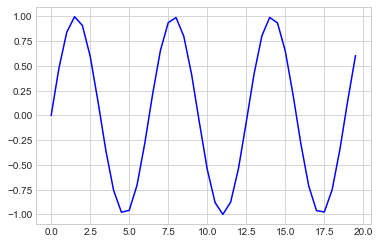

In [230]:
plt.plot(x, y, color='blue')

In [231]:
def load_data():
    train_x = generate_x(10)
    train_y = random_function(train_x)
    val_x = generate_x(6)
    val_y = random_function(val_x)
    test_x = generate_x(30)
    test_y = random_function(test_x)
    return train_x, train_y, val_x, val_y, test_x, test_y

In [232]:
train_x, train_y, val_x, val_y, test_x, test_y= load_data()

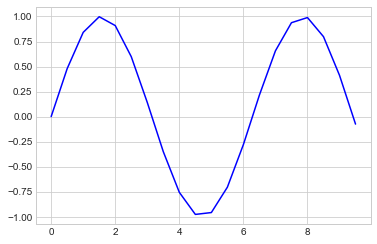

In [233]:
plt.plot(train_x, train_y, color='blue')

In [234]:
# Build a Keras Dense Model.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [256]:
model = keras.Sequential(name="my_sequential")
#model.add(tf.keras.layers.LayerNormalization())
model.add(layers.Dense(100, activation="relu", name="layer1"))
model.add(layers.Dense(50, activation="relu", name="layer2"))
model.add(layers.Dense(1, name="layer3"))

In [267]:
model = keras.Sequential()
model.add(layers.Dense(100))
model.add(layers.LeakyReLU(alpha=0.03))
model.add(layers.Dense(100))
model.add(layers.LeakyReLU(alpha=0.03))
model.add(layers.Dense(1))

In [268]:
model.compile(
    #optimizer=keras.optimizers.Adam(learning_rate=0.001),
    optimizer="sgd",
    loss="mean_absolute_error",
    metrics=["acc"]
)

In [269]:
history = model.fit(
    x=train_x,
    y=train_y,
#    batch_size=10,
    epochs=100,
    steps_per_epoch=10,
    verbose=1,
 #   callbacks=None,
    #validation_split=0.3,
    validation_data=(val_x, val_y)
)

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6486 - acc: 0.0500 - val_loss: 0.7437 - val_acc: 0.0833
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7206 - acc: 0.0500 - val_loss: 0.8190 - val_acc: 0.0833
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7229 - acc: 0.0500 - val_loss: 0.6389 - val_acc: 0.0833
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6860 - acc: 0.0500 - val_loss: 0.7612 - val_acc: 0.0833
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6374 - acc: 0.0500 - val_loss: 0.7570 - val_acc: 0.0833
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6796 - acc: 0.0500 - val_loss: 0.6040 - val_acc: 0.0833
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6438 - acc: 0.0500 - val_loss: 0.7581 - val_acc: 0.0833
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6557 - 

In [270]:
print(history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


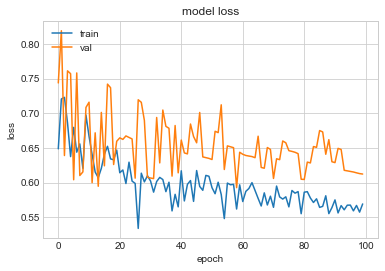

In [271]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

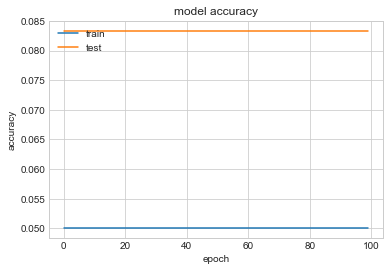

In [272]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()